# Analysis of results of standartized language test Korablik (typically developing population)

Valeriia Lezzhova, Asya Esaulenko

Methods

Korablik is a standartized language test for children of 3-7 years old, which evaluates child's language abilities in speech comprehension and production. Test includes 11 subtests: Nouns Comprehension, Verbs Comprehension, Syntax Comprehension, Nonwords Comprehension, Discourse Comprehension, Nonwords repetition, Nouns Production, Verbs Production, Syntax Production, Sentence Repetition and Discource prosuctions. All subtests have scores, which allows quantitative analysis, which we will conduct in this project. 

Our data icludes total of 209 typically developing children. We decided to go with healthy children (without taking clinical group into analysis) because the data is much more numerous, while data for clinical group is not enough at all for any statistical analysis (~10).

Project consists of 2 parts:
1. Analysis of first 10 subtests;
2. Analysis of Discource production subtest. 

(it is that way, since data for the last suntest is not fully scored yet, therefore it is not in the official table)



In [54]:
import pandas as pd
import csv
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Part 1:

First we upload all our tables (we have separate tables for each age group). We then merge them all together through SQL. We use SQL besause later we will need it to make several queries to check our data. 

In [56]:
read_file3 = pd.read_excel (r'D:\Qmet_project\Python\Controls_all.xlsx', sheet_name=0)
Controls_csv3 = read_file3.to_csv (r'D:\Qmet_project\Python\Controls_all.csv', index = None, header=True)

df_Controls3 = pd.read_csv('D:\Qmet_project\Python\Controls_all.csv', sep=',', encoding='utf-8')
df_Controls3.head()

,Age,Gender,ID,Nouns_Comprehension,Verbs_Comprehension,Syntax_Comprehension,Nonwords_Comprehension,Discource_Comprehension,Nonwords_Repetition,Nouns_Production,Verbs_Production,Syntax_Production,Syntax_Repetition
0,3,m,N312,50,38,54.0,46.0,63.0,94.0,42.0,13.0,81.0,62.0
1,3,f,N313,88,79,67.0,50.0,69.0,96.0,71.0,46.0,85.0,60.0
2,3,f,N336,63,79,50.0,NaN,63.0,90.0,46.0,63.0,10.0,NaN
3,3,m,N361,83,92,79.0,100.0,NaN,98.0,54.0,88.0,88.0,83.0
4,3,f,N803,58,50,33.0,88.0,19.0,71.0,42.0,21.0,23.0,NaN


In [57]:
read_file4 = pd.read_excel (r'D:\Qmet_project\Python\Controls_all.xlsx', sheet_name=1)
Controls_csv4 = read_file4.to_csv (r'D:\Qmet_project\Python\Controls_all.csv', index = None, header=True)

df_Controls4 = pd.read_csv(r'D:\Qmet_project\Python\Controls_all.csv', sep=',', encoding='utf-8')
df_Controls4.head()

,Age,Gender,ID,Nouns_Comprehension,Verbs_Comprehension,Syntax_Comprehension,Nonwords_Comprehension,Discource_Comprehension,Nonwords_Repetition,Nouns_Production,Verbs_Production,Syntax_Production,Syntax_Repetition
0,4,m,N304,83,96.0,71.0,88.0,56.0,83.0,75,63.0,94.0,85.0
1,4,f,N309,96,96.0,79.0,92.0,81.0,92.0,83,75.0,79.0,87.0
2,4,m,N702,67,75.0,75.0,83.0,63.0,88.0,50,59.0,85.0,63.0
3,4,f,N704,83,58.0,83.0,88.0,50.0,73.0,71,59.0,94.0,97.0
4,4,m,N339,79,67.0,71.0,17.0,50.0,90.0,54,59.0,NaN,52.0


In [58]:
read_file5 = pd.read_excel (r'D:\Qmet_project\Python\Controls_all.xlsx', sheet_name=2)
Controls_csv5 = read_file5.to_csv (r'D:\Qmet_project\Python\Controls_all.csv', index = None, header=True)

df_Controls5 = pd.read_csv(r'D:\Qmet_project\Python\Controls_all.csv', sep=',', encoding='utf-8')
df_Controls5.head()

,Age,Gender,ID,Nouns_Comprehension,Verbs_Comprehension,Syntax_Comprehension,Nonwords_Comprehension,Discource_Comprehension,Nonwords_Repetition,Nouns_Production,Verbs_Production,Syntax_Production,Syntax_Repetition
0,5.0,f,N403,88,100,96,88,81.0,100,75,75,86.0,84
1,5.0,m,N303,100,75,88,96,88.0,92,88,88,97.0,87
2,5.0,f,N204,83,88,67,100,75.0,92,71,67,76.0,85
3,5.0,m,N205,100,96,88,100,63.0,98,75,92,93.0,86
4,5.0,m,N611,96,96,92,100,94.0,98,79,83,94.0,98


In [59]:
read_file6 = pd.read_excel (r'D:\Qmet_project\Python\Controls_all.xlsx', sheet_name=3)
Controls_csv6 = read_file6.to_csv (r'D:\Qmet_project\Python\Controls_all.csv', index = None, header=True)

df_Controls6 = pd.read_csv(r'D:\Qmet_project\Python\Controls_all.csv', sep=',', encoding='utf-8')
df_Controls6.head()

,Age,Gender,ID,Nouns_Comprehension,Verbs_Comprehension,Syntax_Comprehension,Nonwords_Comprehension,Discource_Comprehension,Nonwords_Repetition,Nouns_Production,Verbs_Production,Syntax_Production,Syntax_Repetition
0,6.0,f,N405,92,96.0,83,96.0,63,94,75,88,87.0,82.0
1,6.0,m,N302,100,88.0,92,88.0,94,98,88,79,92.0,87.0
2,6.0,m,N200,100,100.0,92,100.0,94,100,79,88,95.0,91.0
3,6.0,m,N201,100,96.0,96,100.0,81,100,92,79,90.0,92.0
4,6.0,f,N203,100,96.0,88,100.0,100,100,79,67,94.0,95.0


In [60]:
read_file7 = pd.read_excel (r'D:\Qmet_project\Python\Controls_all.xlsx', sheet_name=4)
Controls_csv7 = read_file7.to_csv (r'D:\Qmet_project\Python\Controls_all.csv', index = None, header=True)

df_Controls7 = pd.read_csv(r'D:\Qmet_project\Python\Controls_all.csv', sep=',', encoding='utf-8')
df_Controls7.head()

,Age,Gender,ID,Nouns_Comprehension,Verbs_Comprehension,Syntax_Comprehension,Nonwords_Comprehension,Discource_Comprehension,Nonwords_Repetition,Nouns_Production,Verbs_Production,Syntax_Production,Syntax_Repetition
0,7,m,N400,92,92,92,96,100,98,88,88,93,95
1,7,f,N202,96,92,96,100,56,100,79,67,94,83
2,7,m,N206,100,96,100,100,94,100,96,83,97,89
3,7,m,N703,96,92,88,92,94,100,88,75,92,100
4,7,m,N323,100,88,67,92,100,98,92,83,93,95


In [61]:
con = sqlite3.connect("Participants.db")
cur = con.cursor()

In [62]:
df_Controls3.to_sql(name='Participants', con=con, if_exists='replace')

In [63]:
df_Controls4.to_sql(name='Participants', con=con, if_exists='append')

In [64]:
df_Controls5.to_sql(name='Participants', con=con, if_exists='append')

In [65]:
df_Controls6.to_sql(name='Participants', con=con, if_exists='append')

In [66]:
df_Controls7.to_sql(name='Participants', con=con, if_exists='append')

In [67]:
con.commit()

Let's check if all our data uploaded corretly. 

In [68]:
for row in cur.execute('SELECT * FROM Participants'):
    print(row)

(0, 3, 'm', 'N312', 50, 38, 54.0, 46.0, 63.0, 94.0, 42.0, 13.0, 81.0, 62.0)
(1, 3, 'f', 'N313', 88, 79, 67.0, 50.0, 69.0, 96.0, 71.0, 46.0, 85.0, 60.0)
(2, 3, 'f', 'N336', 63, 79, 50.0, None, 63.0, 90.0, 46.0, 63.0, 10.0, None)
(3, 3, 'm', 'N361', 83, 92, 79.0, 100.0, None, 98.0, 54.0, 88.0, 88.0, 83.0)
(4, 3, 'f', 'N803', 58, 50, 33.0, 88.0, 19.0, 71.0, 42.0, 21.0, 23.0, None)
(5, 3, 'm', 'N805', 71, 96, 79.0, 17.0, 69.0, 94.0, 58.0, 50.0, 52.0, 82.0)
(6, 3, 'f', 'N808', 67, 71, 46.0, 100.0, 75.0, 98.0, 46.0, 58.0, 40.0, 14.0)
(7, 3, 'f', 'N814', 100, 88, 92.0, 96.0, 100.0, 96.0, 71.0, 71.0, 89.0, 89.0)
(8, 3, 'f', 'N819', 79, 63, None, 8.0, None, None, 29.0, None, None, None)
(9, 3, 'm', 'N822', 100, 92, 83.0, 96.0, 100.0, 100.0, 96.0, 92.0, 98.0, 92.0)
(10, 3, 'f', 'N372', 71, 67, 50.0, None, None, 50.0, 33.0, None, None, None)
(11, 3, 'm', 'N373', 88, 67, 54.0, None, None, 46.0, 46.0, None, None, None)
(12, 3, 'f', 'N837', 67, 67, 63.0, 63.0, 56.0, 96.0, 58.0, 58.0, None, 68.0)
(13

Looks like it.

Then we should read our SQL query (which contains all data) through pandas. 
Let's also see how the end of our table looks.

In [16]:
SQL_Query = pd.read_sql_query('SELECT * FROM Participants', con)
SQL_Query.tail()

,index,Age,Gender,ID,Nouns_Comprehension,Verbs_Comprehension,Syntax_Comprehension,Nonwords_Comprehension,Discource_Comprehension,Nonwords_Repetition,Nouns_Production,Verbs_Production,Syntax_Production,Syntax_Repetition
204,25,7,f,N852,100,96.0,92.0,100.0,100.0,100.0,96.0,96.0,100.0,100.0
205,26,7,f,N853,96,100.0,96.0,100.0,100.0,98.0,96.0,96.0,99.0,100.0
206,27,7,f,N854,100,100.0,92.0,100.0,100.0,100.0,92.0,96.0,97.0,100.0
207,28,7,f,N855,100,100.0,100.0,100.0,100.0,100.0,83.0,96.0,96.0,100.0
208,29,7,f,N856,92,96.0,83.0,96.0,94.0,100.0,100.0,100.0,97.0,100.0


Now let's look at the distribution across all ages and genders.

In [17]:
SQL_Query.groupby(['Age','Gender']).size()

Age  Gender
3    f         20
     m         15
4    f         29
     m         18
5    f         22
     m         18
6    f         34
     m         23
7    f         16
     m         14
dtype: int64

We can see that the data is not equally distributed across the groups. Let's still visualize these results to see the proportions better.

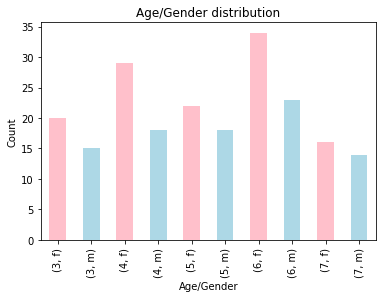

In [18]:
my_colors = ('pink', 'lightblue')

ag = SQL_Query.groupby(['Age','Gender']).size()
ag.plot.bar(color=my_colors);
plt.title('Age/Gender distribution')
plt.xlabel('Age/Gender')
plt.ylabel('Count');



We can see that age/gender disribution is not equal at all (there are more girls in each age group). We should take that into account, since in standartized language tests the amount of males and females should be around the same for each age group to make any claims. We will continue to work with this data anyway (since we have no choice) but now we know where we lack participants and of what gender. 

Now let's look at the average scores of each age group in each subtest to see how each group perform. We will also visualize that for more comfortable analysis. 

In [21]:
SQL_Query.groupby("Age").agg({"Nouns_Comprehension": "mean", "Verbs_Comprehension": "mean", "Syntax_Comprehension": "mean", "Nonwords_Comprehension": "mean", "Discource_Comprehension": "mean", "Nonwords_Repetition": "mean", "Nouns_Production": "mean", "Verbs_Production": "mean", "Syntax_Production": "mean", "Syntax_Repetition": "mean" })

,Nouns_Comprehension,Verbs_Comprehension,Syntax_Comprehension,Nonwords_Comprehension,Discource_Comprehension,Nonwords_Repetition,Nouns_Production,Verbs_Production,Syntax_Production,Syntax_Repetition
Age,,,,,,,,,,
3,78.571429,75.771429,72.968750,72.074074,67.333333,90.454545,61.676471,61.838710,72.000000,74.500000
4,87.276596,81.260870,80.681818,73.585366,70.974359,93.391304,68.702128,72.000000,84.382353,82.142857
5,94.125000,90.325000,87.450000,91.825000,85.205128,96.425000,82.075000,80.475000,89.666667,89.900000
6,95.736842,93.857143,91.315789,94.803571,92.000000,96.807018,87.807018,87.736842,93.962264,92.872727
7,98.000000,97.066667,92.566667,97.866667,96.533333,98.600000,92.100000,91.833333,94.800000,96.866667


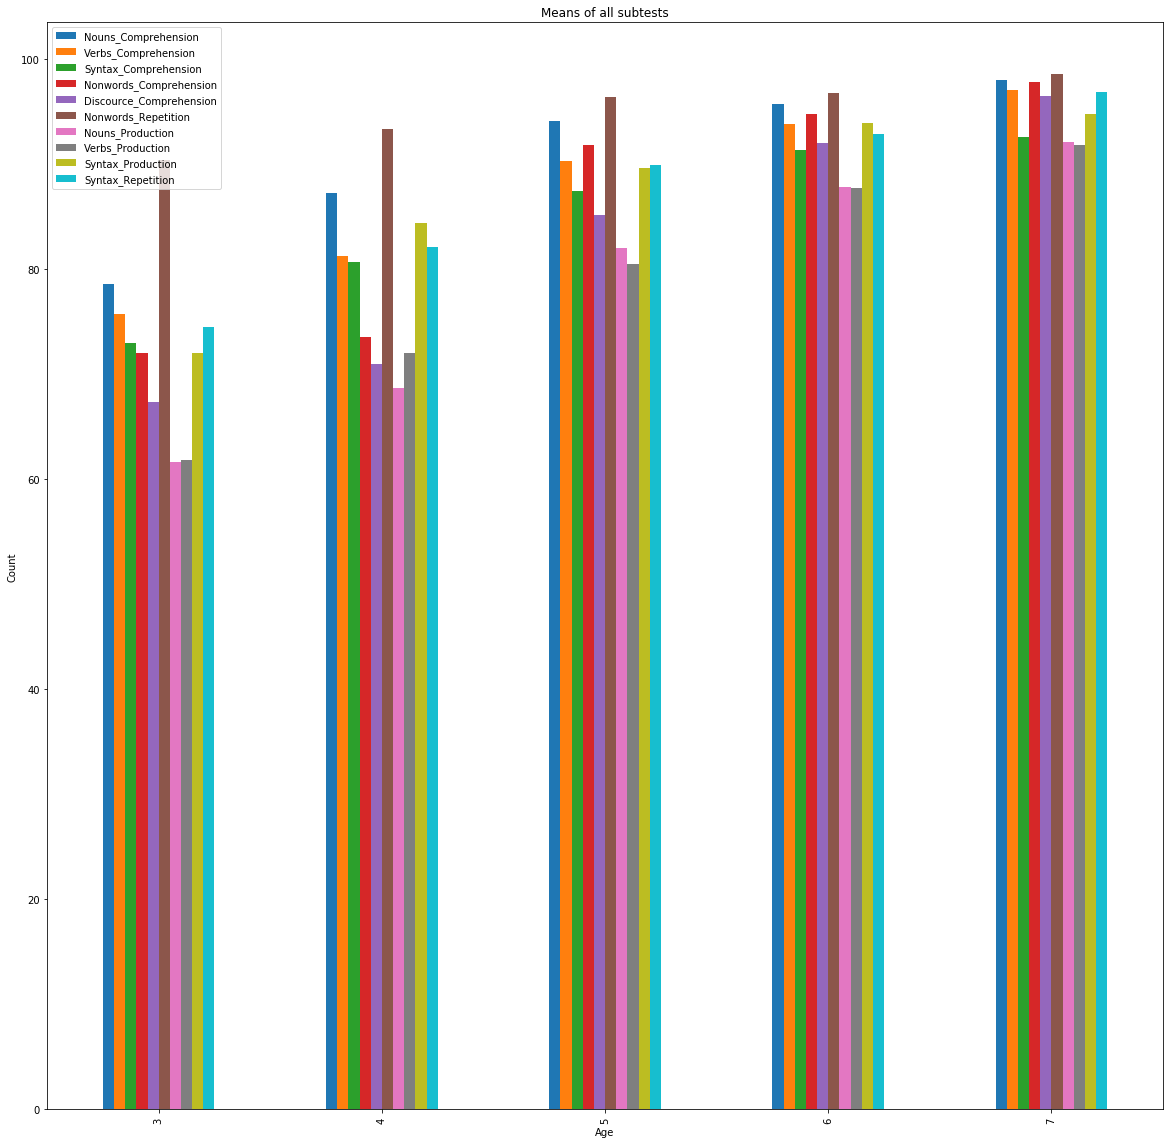

In [22]:
d = SQL_Query.groupby("Age").agg({"Nouns_Comprehension": "mean", "Verbs_Comprehension": "mean", "Syntax_Comprehension": "mean", "Nonwords_Comprehension": "mean", "Discource_Comprehension": "mean", "Nonwords_Repetition": "mean", "Nouns_Production": "mean", "Verbs_Production": "mean", "Syntax_Production": "mean", "Syntax_Repetition": "mean" })
d.plot.bar(figsize=(20,20));
plt.title('Means of all subtests')
plt.xlabel('Age')
plt.ylabel('Count');

Since this table is too big for pleasant visualization, we decided to break it down on several sections, namely, complrehension part, production part and repetition part.

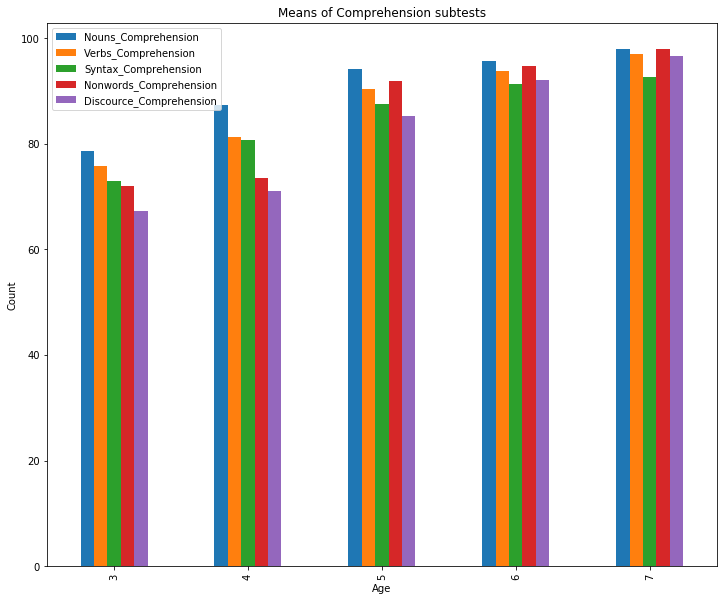

In [23]:
dc = SQL_Query.groupby("Age").agg({"Nouns_Comprehension": "mean", "Verbs_Comprehension": "mean", "Syntax_Comprehension": "mean", "Nonwords_Comprehension": "mean", "Discource_Comprehension": "mean" })
dc.plot.bar(figsize=(12,10));
plt.title('Means of Comprehension subtests')
plt.xlabel('Age')
plt.ylabel('Count');

(Still looks a bit overwhelming and will take some time to look through it but better than what was before)



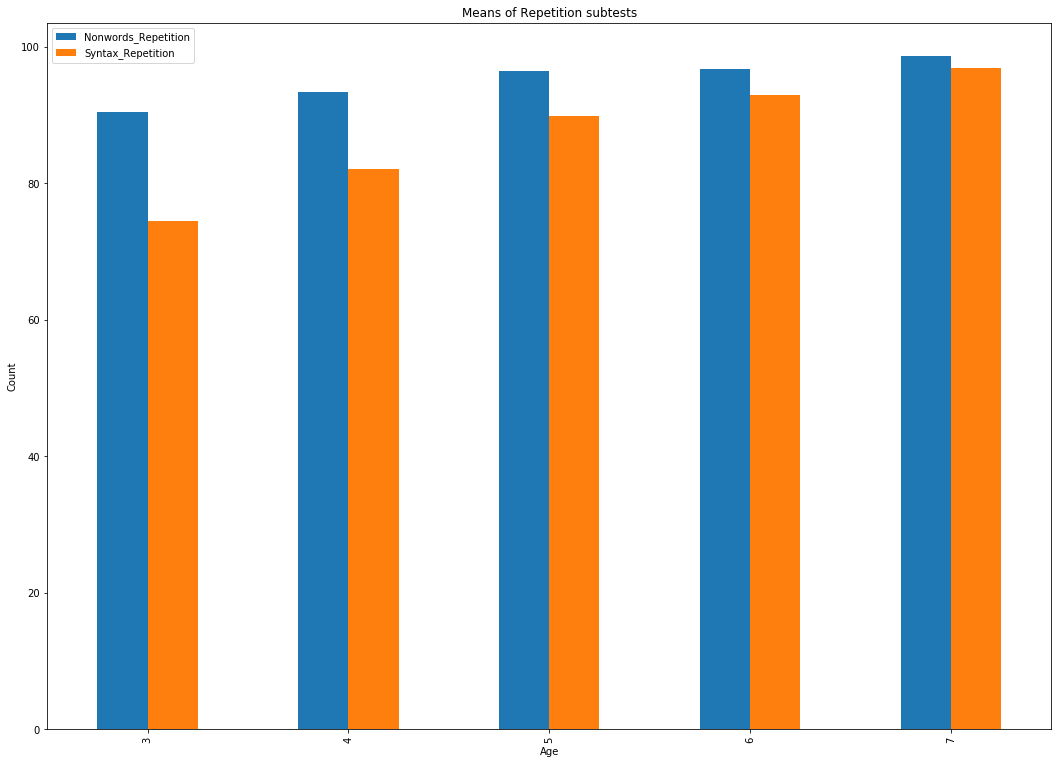

In [24]:
dr = SQL_Query.groupby("Age").agg({"Nonwords_Repetition": "mean", "Syntax_Repetition": "mean"})
dr.plot.bar(figsize=(18,13));
plt.title('Means of Repetition subtests')
plt.xlabel('Age')
plt.ylabel('Count');

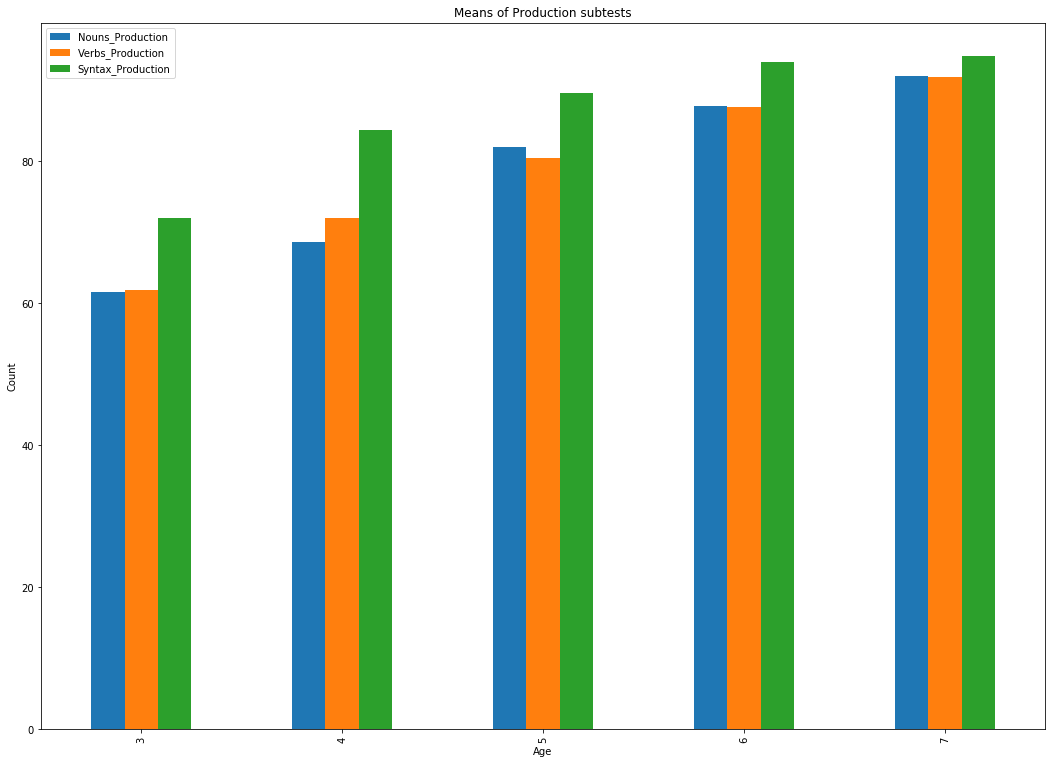

In [25]:
dp = SQL_Query.groupby("Age").agg({"Nouns_Production": "mean", "Verbs_Production": "mean", "Syntax_Production": "mean"})
dp.plot.bar(figsize=(18,13));
plt.title('Means of Production subtests')
plt.xlabel('Age')
plt.ylabel('Count');

In general we can see that scores in each subtest are growing with the age, which is the way it should be. What is interesting here is that in all age groups children are better at producing sentences than single words.

Let's also look at means across all subtests. (to see if the situation is the other way there) 




In [26]:
SQL_Query['Mean'] = SQL_Query.iloc[:, 5:14].mean(axis=1)

To make the data more or less equal we'll need to exclude all participants who lack at least one subtest result.

In [28]:
no_na = SQL_Query.dropna()

In [29]:
no_na.groupby(["Age"]).agg({"Mean": "mean"})

,Mean
Age,
3,75.944444
4,80.650794
5,88.494152
6,92.564270
7,95.359259


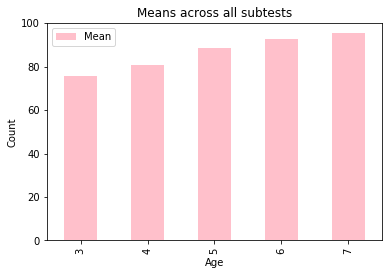

In [123]:
no_na.groupby(["Age"]).agg({"Mean": "mean"}).plot.bar(color='pink');
plt.title('Means across all subtests')
plt.xlabel('Age')
plt.ylabel('Count');


All in all, the results show the same growing tendency as the results for each subtest. That indicates that the data that we work with is more or less reliable as well as the test (of course, for more profound conclusions we would need to investigate test/re-test results but, unfortunately, we do not have that data now).

Now let's look at our maximum and minimum values, and how they differ from the mean.

In [31]:
SQL_Query.groupby(["Age", 'Gender']).agg({"Nouns_Comprehension": "max",  "Verbs_Comprehension": "max", "Syntax_Comprehension": "max", "Nonwords_Comprehension": "max", "Discource_Comprehension": "max",  "Nonwords_Repetition": "max", "Nouns_Production": "max", "Verbs_Production": "max", "Syntax_Production": "max", "Syntax_Repetition": "max"})

Nouns_Comprehension  Verbs_Comprehension  Syntax_Comprehension  \
Age Gender                                                                   
3   f                       100                 92.0                  96.0   
    m                       100                 96.0                 100.0   
4   f                       100                100.0                 100.0   
    m                       100                100.0                  92.0   
5   f                       100                100.0                 100.0   
    m                       100                100.0                 100.0   
6   f                       100                100.0                 100.0   
    m                       100                100.0                  96.0   
7   f                       100                100.0                 100.0   
    m                       100                100.0                 100.0   

            Nonwords_Comprehension  Discource_Comprehension  \
Age Gender                                                    
3   f                        100.0                    100.0   
    m                        100.0                    100.0   
4   f                        100.0                    100.0   
    m                        100.0                     94.0   
5   f                        100.0                    100.0   
    m                        100.0                    100.0   
6   f                        100.0                    100.0   
    m                        100.0                    100.0   
7   f                        100.0                    100.0   
    m                        100.0                    100.0   

            Nonwords_Repetition  Nouns_Production  Verbs_Production  \
Age Gender                                                            
3   f                     100.0              83.0              79.0   
    m                     100.0              96.0              92.0   
4   f                     100.0             100.0              96.0   
    m                      98.0              96.0              79.0   
5   f                     100.0              96.0              96.0   
    m                     100.0              96.0             100.0   
6   f                     100.0             100.0             100.0   
    m                     100.0             100.0             100.0   
7   f                     100.0             100.0             100.0   
    m                     100.0             100.0             100.0   

            Syntax_Production  Syntax_Repetition  
Age Gender                                        
3   f                    93.0               98.0  
    m                    98.0               95.0  
4   f                    95.0               98.0  
    m                    95.0               97.0  
5   f                    99.0              100.0  
    m                    97.0              100.0  
6   f                   100.0              100.0  
    m                   100.0              100.0  
7   f                   100.0              100.0  
    m                    99.0              100.0

In [32]:
SQL_Query.groupby(["Age", "Gender"]).agg({"Nouns_Comprehension": "min",  "Verbs_Comprehension": "min", "Syntax_Comprehension": "min", "Nonwords_Comprehension": "min", "Discource_Comprehension": "min",  "Nonwords_Repetition": "min", "Nouns_Production": "min", "Verbs_Production": "min", "Syntax_Production": "min", "Syntax_Repetition": "min"})

Nouns_Comprehension  Verbs_Comprehension  Syntax_Comprehension  \
Age Gender                                                                   
3   f                        58                 50.0                  33.0   
    m                        50                 38.0                  46.0   
4   f                        75                 46.0                  67.0   
    m                        67                 25.0                  50.0   
5   f                        75                 75.0                  67.0   
    m                        71                 71.0                  67.0   
6   f                        79                 79.0                  79.0   
    m                        58                 71.0                  67.0   
7   f                        92                 92.0                  83.0   
    m                        92                 88.0                  67.0   

            Nonwords_Comprehension  Discource_Comprehension  \
Age Gender                                                    
3   f                          8.0                     19.0   
    m                         17.0                     44.0   
4   f                         13.0                     25.0   
    m                         17.0                     50.0   
5   f                         17.0                     50.0   
    m                         83.0                     63.0   
6   f                         79.0                     63.0   
    m                         42.0                     56.0   
7   f                         88.0                     56.0   
    m                         88.0                     88.0   

            Nonwords_Repetition  Nouns_Production  Verbs_Production  \
Age Gender                                                            
3   f                      50.0              29.0              21.0   
    m                      46.0              42.0              13.0   
4   f                      73.0              46.0              46.0   
    m                      71.0              42.0              50.0   
5   f                      79.0              59.0              63.0   
    m                      92.0              67.0              21.0   
6   f                      83.0              67.0              67.0   
    m                      77.0              63.0              63.0   
7   f                      96.0               1.0              67.0   
    m                      92.0              88.0              75.0   

            Syntax_Production  Syntax_Repetition  
Age Gender                                        
3   f                    10.0               14.0  
    m                    52.0               62.0  
4   f                    67.0               15.0  
    m                    36.0               52.0  
5   f                    76.0               66.0  
    m                    75.0               69.0  
6   f                    87.0               70.0  
    m                    84.0               77.0  
7   f                    85.0               83.0  
    m                    85.0               87.0

We see here that in many subtests min and max values differ, with some values deviating quite a bit from the mean, which might not be a good sign. 

So let's visualize our data and check the variety and the number of outliers we've got. 

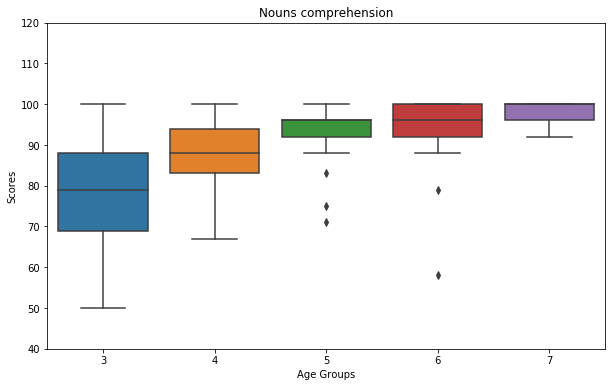

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Age", y="Nouns_Comprehension", data=SQL_Query)
plt.ylim((40, 120))
plt.title('Nouns comprehension')
plt.ylabel('Scores')
plt.xlabel('Age Groups');

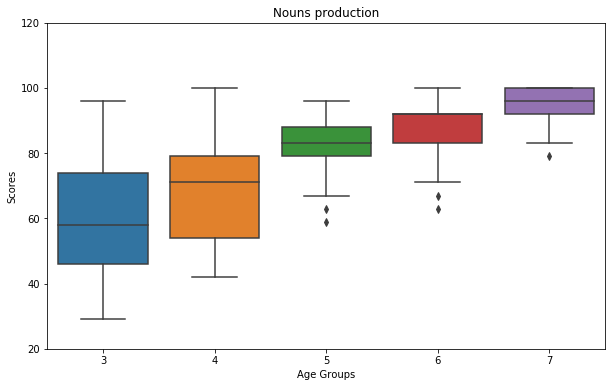

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Age", y="Nouns_Production", data=SQL_Query)
plt.ylim((20, 120))
plt.title('Nouns production')
plt.ylabel('Scores')
plt.xlabel('Age Groups');

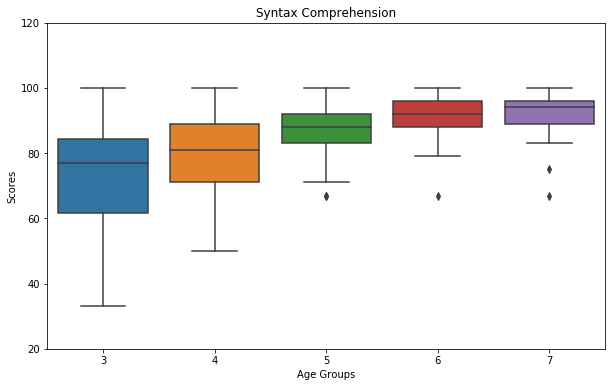

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Age", y="Syntax_Comprehension", data=SQL_Query)
plt.ylim((20, 120))
plt.title('Syntax Comprehension')
plt.ylabel('Scores')
plt.xlabel('Age Groups');

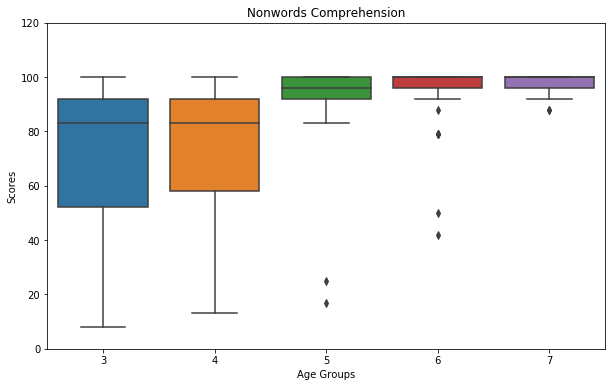

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Age", y="Nonwords_Comprehension", data=SQL_Query)
plt.ylim((0, 120))
plt.title('Nonwords Comprehension')
plt.ylabel('Scores')
plt.xlabel('Age Groups');

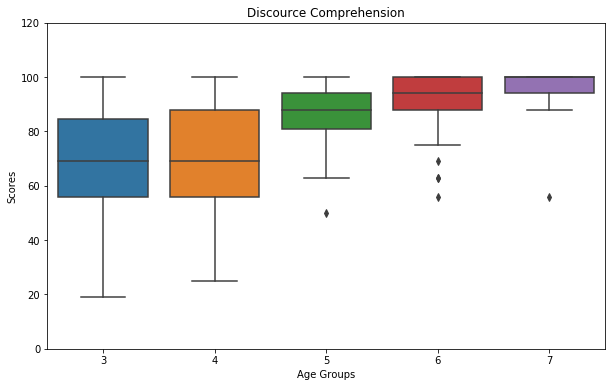

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Age", y="Discource_Comprehension", data=SQL_Query)
plt.ylim((0, 120))
plt.title('Discource Comprehension')
plt.ylabel('Scores')
plt.xlabel('Age Groups');

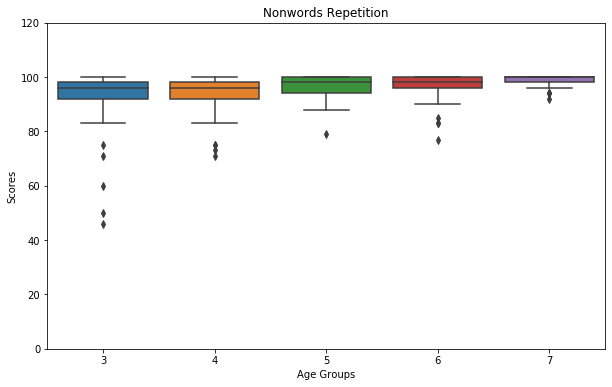

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Age", y="Nonwords_Repetition", data=SQL_Query)
plt.ylim((0, 120))
plt.title('Nonwords Repetition')
plt.ylabel('Scores')
plt.xlabel('Age Groups');

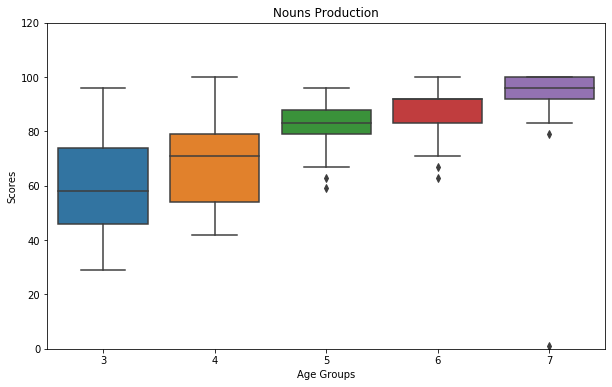

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Age", y="Nouns_Production", data=SQL_Query)
plt.ylim((0, 120))
plt.title('Nouns Production')
plt.ylabel('Scores')
plt.xlabel('Age Groups');

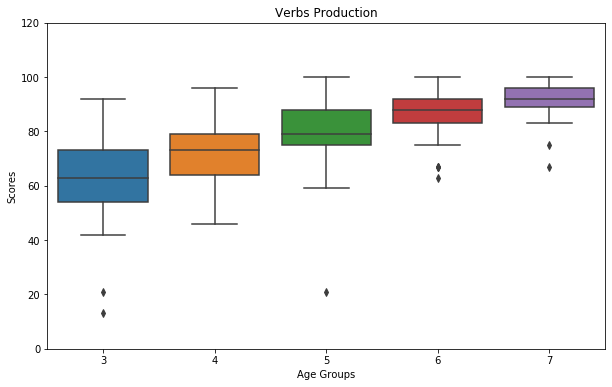

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Age", y="Verbs_Production", data=SQL_Query)
plt.ylim((0, 120))
plt.title('Verbs Production')
plt.ylabel('Scores')
plt.xlabel('Age Groups');

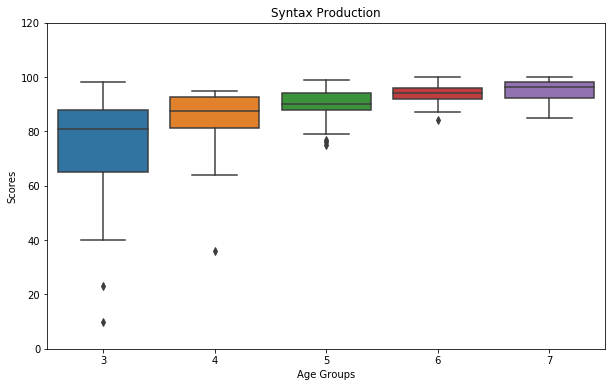

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Age", y="Syntax_Production", data=SQL_Query)
plt.ylim((0, 120))
plt.title('Syntax Production')
plt.ylabel('Scores')
plt.xlabel('Age Groups');

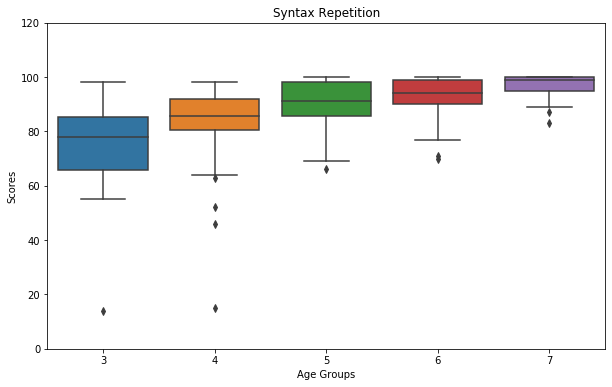

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Age", y="Syntax_Repetition", data=SQL_Query)
plt.ylim((0, 120))
plt.title('Syntax Repetition')
plt.ylabel('Scores')
plt.xlabel('Age Groups');

In general we can see that tendency is more or less the same across all subtests, namely, results are much more varied at 3 years old and they disperse less and less later on for older children. These results coinside with the previous research of speech language pathologists, since, generally, it is normal when children perform differently at younger age but later on (at 6-7 years old) all children should show more or less same results. Otherwise, underperformed children of 6-7 years old would be considered not typically developing and would need special classes. 

We can see some outliers in production tasks in 3 and 4 years old. It also seems normal, since these are just cases when a child started the subtest but could not finish it because it was too hard. Genarally, it is totally fine, when 3-4 year olds could not finish all sutests and have better comand of impressive and not expressive language. 

On the other hand, the outlier in other age groups need much more investigation (what was the reason for such low score), and perhaps they should be excluded from the analysis (e.g. if the child shows anomally low score across all subtests or all production subtest; was the reason for that the underdevelopment of speech or just poor understanding of instructions).




Next we will look at lowest 5%. This score we will be used in the future to identify if child falls within the typically developing group or not. 

In [43]:
grouped = SQL_Query.groupby("Age")    
grouped.quantile(.05)

0.05,index,Nouns_Comprehension,Verbs_Comprehension,Syntax_Comprehension,Nonwords_Comprehension,Discource_Comprehension,Nonwords_Repetition,Nouns_Production,Verbs_Production,Syntax_Production,Syntax_Repetition,Mean
Age,,,,,,,,,,,,
3,1.70,55.6,52.8,46.0,24.5,30.7,56.0,38.85,31.5,26.40,55.50,48.012500
4,2.30,72.2,49.0,63.6,25.0,50.0,75.0,47.20,50.0,65.95,52.55,60.670000
5,1.95,82.6,75.0,70.8,80.1,63.0,89.9,66.80,62.8,76.90,74.70,80.074306
6,2.80,88.0,82.0,79.0,79.0,67.8,84.6,71.00,67.0,88.80,77.70,83.355556
7,1.45,92.0,92.0,78.6,89.8,88.0,94.0,80.80,78.6,85.45,87.90,87.272222


Now we want to check if any of our typically developing children perform bed in all subtests of one type (production or comprehension), using the scores of the lowest 5th percentile. 

3 y.o (Comprehension)

In [110]:
for row in cur.execute("SELECT * FROM Participants WHERE Age='3' AND Nouns_Comprehension <='55.6' AND Verbs_Comprehension <= '52.8' AND Syntax_Comprehension <= '46.0' AND Nonwords_Comprehension <= '24.5' AND Discource_Comprehension <= '30.7'"):
    print('Not typically developing 3 year olds in comprehension:', row)


3 y.o (Production)

In [109]:
for row in cur.execute("SELECT * FROM Participants WHERE Age='3' AND Nouns_Production <='38.85' AND Verbs_Production <= '31.5' AND Syntax_Production <= '26.0'"):
    print('Not typically developing 3 year olds in production:', row)


4 y.o (Comprehension)

In [108]:
for row in cur.execute("SELECT * FROM Participants WHERE Age='4' AND Nouns_Comprehension <='72.2' AND Verbs_Comprehension <= '49.0' AND Syntax_Comprehension <= '63.6' AND Nonwords_Comprehension <= '25.0' AND Discource_Comprehension <= '50.0'"):
    print('Not typically developing 4 year olds in comprehension:', row)


4 y.o (Production)

In [107]:
for row in cur.execute("SELECT * FROM Participants WHERE Age='4' AND Nouns_Production <='47.20' AND Verbs_Production <= '50.0' AND Syntax_Production <= '65.95'"):
    print('Not typically developing 4 year olds in production:', row)


5 y.o (Comprehension)

In [106]:
for row in cur.execute("SELECT * FROM Participants WHERE Age='5' AND Nouns_Comprehension <='82.6' AND Verbs_Comprehension <= '75.0' AND Syntax_Comprehension <= '70.8' AND Nonwords_Comprehension <= '80.1' AND Discource_Comprehension <= '63.0'"):
    print('Not typically developing 5 year olds in comprehension:', row)


5 y.o (Production)

In [105]:
for row in cur.execute("SELECT * FROM Participants WHERE Age='5' AND Nouns_Production <='66.80' AND Verbs_Production <= '62.8' AND Syntax_Production <= '76.9'"):
    print('Not typically developing 5 year olds in production:', row)

6 y.o (Comprehension)

In [104]:
for row in cur.execute("SELECT * FROM Participants WHERE Age='6' AND Nouns_Comprehension <='88.0' AND Verbs_Comprehension <= '82.0' AND Syntax_Comprehension <= '79.0' AND Nonwords_Comprehension <= '79.0' AND Discource_Comprehension <= '67.8'"):
    print('Not typically developing 6 year olds in comprehension:', row)


6 y.o (Production)

In [103]:
for row in cur.execute("SELECT * FROM Participants WHERE Age='6' AND Nouns_Production <='71.0' AND Verbs_Production <= '67.0' AND Syntax_Production <= '88.8'"):
    print('Not typically developing 6 year olds in production:', row)


7 y.o (Comprehension)

In [102]:
for row in cur.execute("SELECT * FROM Participants WHERE Age='7' AND Nouns_Comprehension <='92.0' AND Verbs_Comprehension <= '92.0' AND Syntax_Comprehension <= '78.6' AND Nonwords_Comprehension <= '89.8' AND Discource_Comprehension <= '88.0'"):
    print('Not typically developing 7 year olds in comprehension:', row)

7 y.o (Production)

In [100]:
for row in cur.execute("SELECT * FROM Participants WHERE Age='7' AND Nouns_Production <='80.8' AND Verbs_Production <= '78.6' AND Syntax_Production <= '85.45'"):
    print('Not typically developing 7 year olds in production:', row)

Yay! Everyone's healthy. This query, of course, is not super useful here but it will be useful for the tables that contain data about not typically developing children and in that case it will be extremely comfortable to automatically identify all children who fall outside the norm in all subtests (or in all comprehension/production subtests. Also could be used for checking single-word production/comprehension, sentence production/comprehension or discource production/comprehension to see if the child has problem in that particular domains.


Part 2:


Because the previous table lacked the discourse data and so we could not analyse it, we'll need to do it separately.

In [112]:
dr = pd.read_excel(r'D:\Qmet_project\Python\Discourse_all.xlsx')
discource = dr.to_csv (r'D:\Qmet_project\Python\Discourse_all.csv', index = None, header=True)
df = pd.read_csv(r'D:\Qmet_project\Python\Discourse_all.csv', sep=',', encoding='utf-8')
df.head()

,ID,Age,Input,Discription,Grammar,Variety,Fastness,Total
0,D04,7.0,"На прогулку пришла девочка, она оставила свою ...",5,5,5,5,5.00
1,D14,7.0,На… над горо… над городом стоял ясный день. Од...,5,5,5,5,5.00
2,D19,7.0,Девочка выгуливала... собаку. У ближайшего дер...,5,5,5,5,5.00
3,D20,7.0,"Вот жил-был дедушка, и у него было две дочери:...",5,5,5,4,4.75
4,D22,7.0,"Мм, ээ. Дедуля, мм, собирал яблоки. Но когда п...",4,5,4,5,4.50


We strip our table of empty rows.

In [113]:
clean_df = df.dropna()

We'll look at the lenght of every produced text and save it in a separate column.

In [117]:
from string import punctuation
def length(text):
    if type(text) == str:
        text = text.lower().strip().split()
        text = [word.strip(punctuation) for word in text]
    return len(text)

In [118]:
d_new = clean_df.copy()

In [119]:
d_new["len"] = d_new["Input"].apply(length)
d_new.head()

,ID,Age,Input,Discription,Grammar,Variety,Fastness,Total,len
0,D04,7.0,"На прогулку пришла девочка, она оставила свою ...",5,5,5,5,5.00,48
1,D14,7.0,На… над горо… над городом стоял ясный день. Од...,5,5,5,5,5.00,94
2,D19,7.0,Девочка выгуливала... собаку. У ближайшего дер...,5,5,5,5,5.00,98
3,D20,7.0,"Вот жил-был дедушка, и у него было две дочери:...",5,5,5,4,4.75,89
4,D22,7.0,"Мм, ээ. Дедуля, мм, собирал яблоки. Но когда п...",4,5,4,5,4.50,51


Now let's check the mean length in each age group.

In [120]:
d_new.groupby(["Age"]).agg({"len": "mean"})

,len
Age,
3.0,25.277778
4.0,25.571429
5.0,33.088235
6.0,32.214286
7.0,42.000000


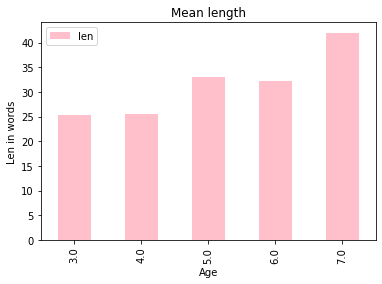

In [125]:
d_new.groupby(["Age"]).agg({"len": "mean"}).plot.bar(color='pink');
plt.title('Mean length')
plt.xlabel('Age')
plt.ylabel('Len in words');

We see that as children grow older, they are able to produce longer texts.

In [126]:
d_new.groupby(["Age"]).agg({"len": "max"})

,len
Age,
3.0,85
4.0,80
5.0,143
6.0,70
7.0,98


In [127]:
d_new.groupby(["Age"]).agg({"len": "min"})

,len
Age,
3.0,4
4.0,10
5.0,14
6.0,9
7.0,12


We see that there is a great difference between the max and min values, therefore we should look at the texts with min values to see if they're worth considering.

Conslusion:

Our data seems quite consistent across all age groups and subtests and it seems reliable. However, we still need more data to equalize all age and gender groups plus we need to check some children with extremely low points (for older ages) to make sure that they fall within the norm and that we can include them in our typically developing data. 

Unfortunately, we couldn't come up with anything else that  could be checked here. We're sorry, if that's not enough for a project for two students. :(